In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)

#### Preprocessing of the data
#### First we drop the unused data, or NA values
#### Then we convert the genres into numerical values so it can be used by the machine learning algorithm



In [2]:
#load data, drop unnecessary columns, and drop all NA values
df = pd.read_csv('music_genre.csv')
df.info()
features = ['instance_id','popularity','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

#### The above features are proposed to do a first revision on the data, things like Artist name,  title and the obtained data are already left out, since they have no direct link to a specific genre. One could say that an artist would probably stick to a specific genre, but this knowledge is irrelevant to new artists, and would lead to overfitting. To check wether we should drop any other columns, we plot the distributions for all the remaining features for each specific genre using seaborn

C:\Users\jens7\AppData\Local\Temp\ipykernel_11876\964427240.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['tempo'] = pd.to_numeric(df['tempo'].str.replace('.', ''), errors='coerce')


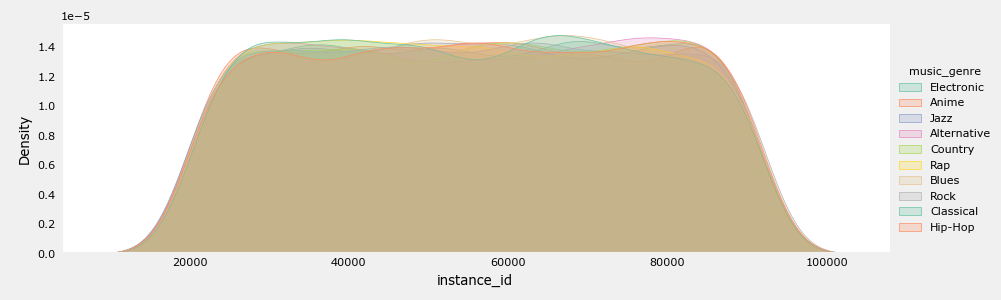

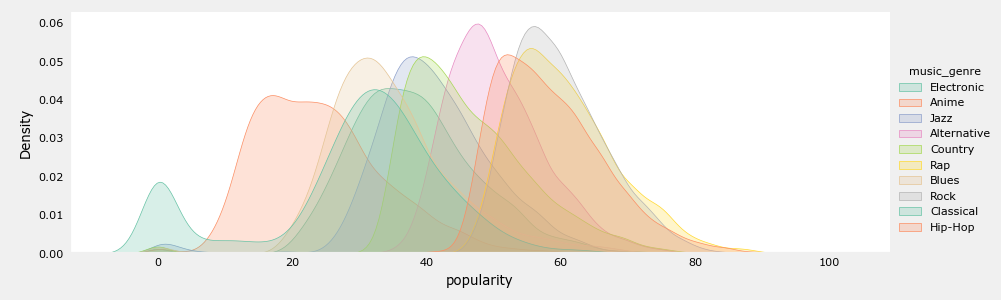

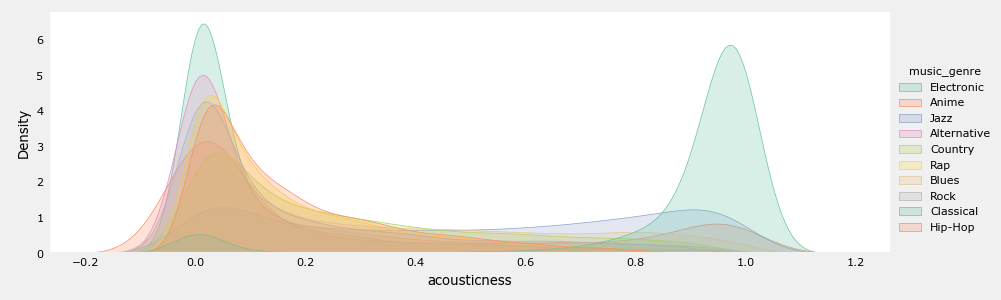

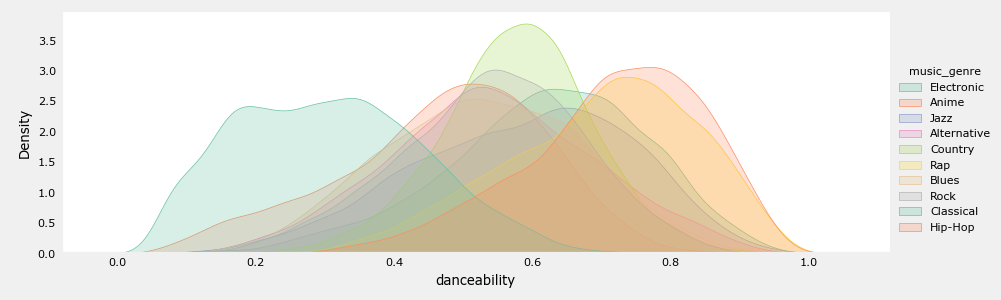

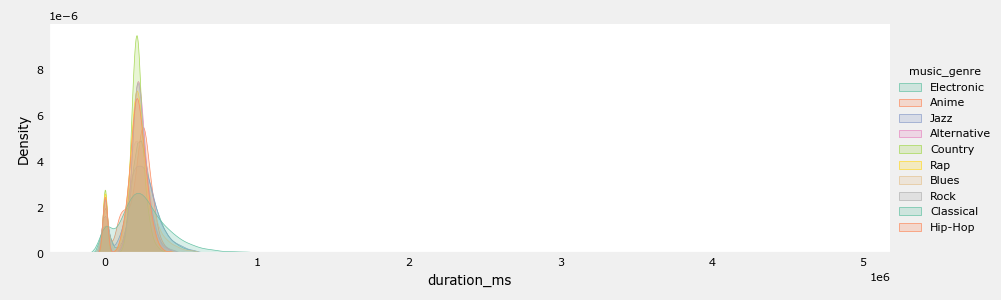

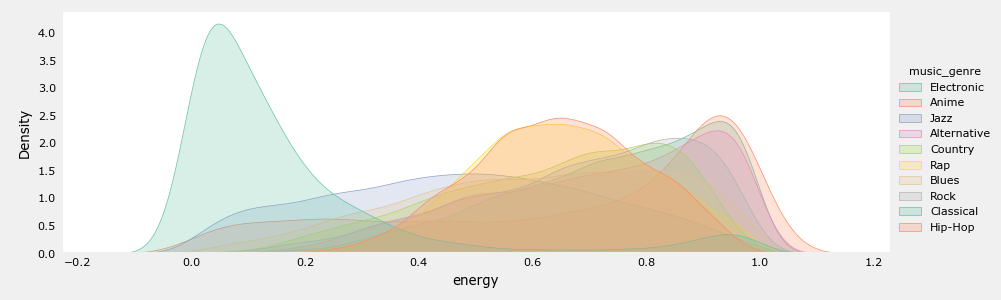

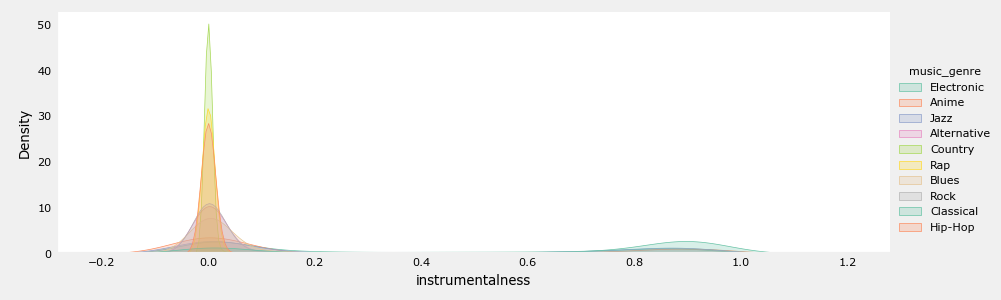

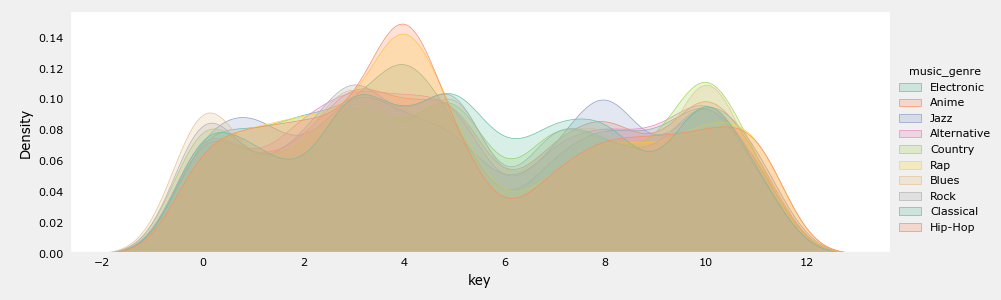

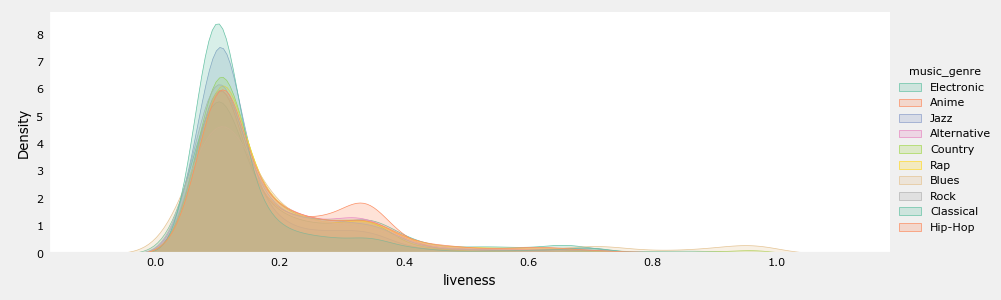

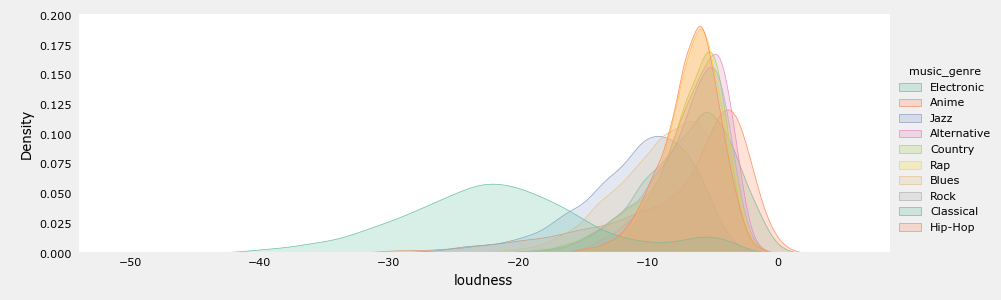

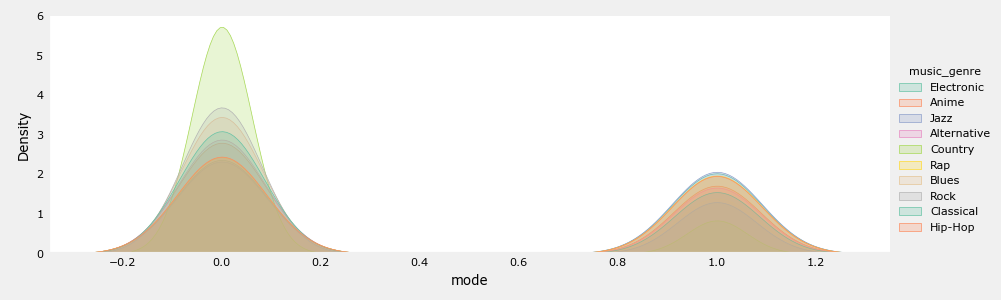

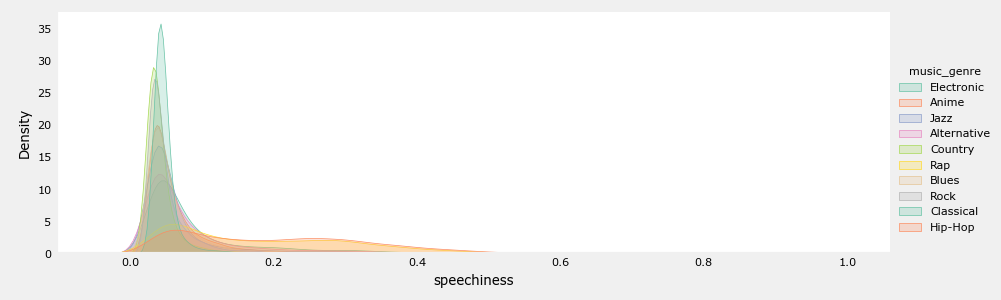

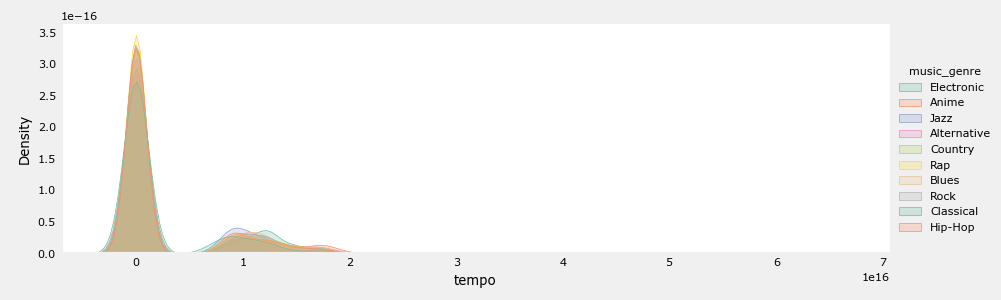

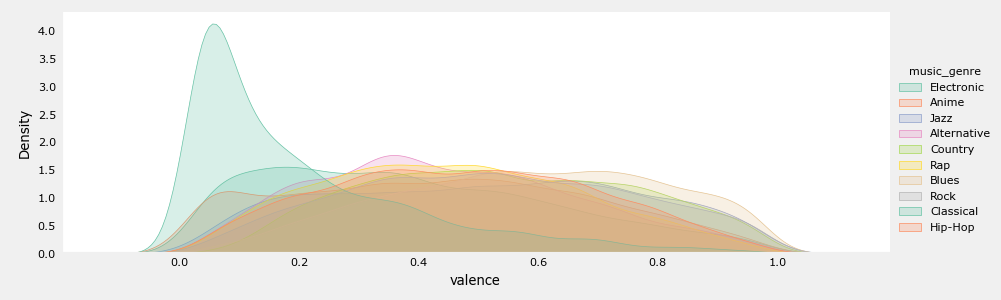

In [3]:
encoder = LabelEncoder()

df['mode'] = encoder.fit_transform(df['mode'])
df['key'] = encoder.fit_transform(df['key'])
df['tempo'] = pd.to_numeric(df['tempo'].str.replace('.', ''), errors='coerce')
df['tempo'] = df['tempo'].fillna(0)

for feature in features:
    fig = sns.FacetGrid(df, hue="music_genre", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
    fig.map(sns.kdeplot, feature, fill=True)
    fig.add_legend()

In [6]:
df = df.drop(['instance_id', 'artist_name', 'track_name', 'key', 'mode','obtained_date','tempo'], axis=1) 
df = df.dropna()
df = df.sample(frac=1)

df['music_genre'] = encoder.fit_transform(df['music_genre'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 4615 to 11061
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   liveness          50000 non-null  float64
 7   loudness          50000 non-null  float64
 8   speechiness       50000 non-null  float64
 9   valence           50000 non-null  float64
 10  music_genre       50000 non-null  int32  
dtypes: float64(10), int32(1)
memory usage: 4.4 MB


In [7]:
#since music_genre is of type "object" we can't apply the neural network to it, we need to encode it into, int this case, an integers
encoder = LabelEncoder()
df['music_genre'] = encoder.fit_transform(df['music_genre'])
print(df.dtypes)

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
music_genre           int64
dtype: object


In [8]:
X = df.drop('music_genre', axis=1)
Y = df['music_genre']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
size = X_train.shape[1]


In [13]:
# UNQ_C3
# GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='linear'),
        
        
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']

    ### END CODE HERE ### 
)
model.summary()


In [14]:
train_2 = model.fit(X_train , Y_train , validation_data=(X_test,Y_test),epochs=100)

Epoch 1/100
1250/1250 [==============================] - 3s 2ms/step - loss: 176.4246 - accuracy: 0.1133 - val_loss: 2.2600 - val_accuracy: 0.1137
Epoch 2/100
1250/1250 [==============================] - 2s 2ms/step - loss: 2.5296 - accuracy: 0.1210 - val_loss: 2.2443 - val_accuracy: 0.1218
Epoch 3/100
1250/1250 [==============================] - 2s 2ms/step - loss: 2.2330 - accuracy: 0.1246 - val_loss: 2.2206 - val_accuracy: 0.1320
Epoch 4/100
1250/1250 [==============================] - 3s 2ms/step - loss: 2.2254 - accuracy: 0.1267 - val_loss: 2.2155 - val_accuracy: 0.1336
Epoch 5/100
1250/1250 [==============================] - 3s 2ms/step - loss: 2.2210 - accuracy: 0.1276 - val_loss: 2.2201 - val_accuracy: 0.1322
Epoch 6/100
1250/1250 [==============================] - 2s 2ms/step - loss: 2.2170 - accuracy: 0.1332 - val_loss: 2.2157 - val_accuracy: 0.1333
Epoch 7/100
1250/1250 [==============================] - 3s 2ms/step - loss: 2.2138 - accuracy: 0.1347 - val_loss: 2.2141 - val_

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)


313/313 [==============================] - 0s 1ms/step - loss: 2.2200 - accuracy: 0.1413


In [ ]:
# UNQ_C2
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    #for i in range(m):
    ### START CODE HERE ### 
    for i in range(m):
        if (y[i] != yhat[i]):
            incorrect+=1
    cerr = incorrect/m        
    ### END CODE HERE ### 
    
    return(cerr)

#### This result was the most optimal result obtained with the classical categorisation techniques seen in the lecture. But this is far from sufficiënt to classify the music genres, and more advanced techniques are needed.

#### In the next part we alto try to run the same technique, but only with the very the that differs a lot between all the different data

In [ ]:
df = df.drop(['speechiness', 'liveness', 'instrumentalness','acousticness'], axis=1) 


X = df.drop('music_genre', axis=1)
Y = df['music_genre']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
size = X_train.shape[1]


In [ ]:

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='linear'),
        
        
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']

    ### END CODE HERE ### 
    # 
)
train_2 = model.fit(X_train , Y_train , validation_data=(X_test,Y_test),epochs=100)

Epoch 1/100
1250/1250 [==============================] - 2s 2ms/step - loss: 735.1329 - accuracy: 0.1135 - val_loss: 174.6283 - val_accuracy: 0.1138
Epoch 2/100
1250/1250 [==============================] - 2s 1ms/step - loss: 50.9369 - accuracy: 0.1181 - val_loss: 39.1868 - val_accuracy: 0.1244
Epoch 3/100
1250/1250 [==============================] - 2s 2ms/step - loss: 16.2282 - accuracy: 0.1229 - val_loss: 6.3745 - val_accuracy: 0.1415
Epoch 4/100
1250/1250 [==============================] - 2s 1ms/step - loss: 6.2684 - accuracy: 0.1286 - val_loss: 3.3257 - val_accuracy: 0.1598
Epoch 5/100
1250/1250 [==============================] - 2s 1ms/step - loss: 4.2177 - accuracy: 0.1372 - val_loss: 3.1631 - val_accuracy: 0.1283
Epoch 6/100
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3924 - accuracy: 0.1413 - val_loss: 2.2468 - val_accuracy: 0.1275
Epoch 7/100
1250/1250 [==============================] - 2s 2ms/step - loss: 4.9330 - accuracy: 0.1352 - val_loss: 2.3921 -

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 910us/step - loss: 2.2135 - accuracy: 0.1326


#### This results is even worse result, so we stick to the first model
